<h3 align='center'>Amazon-Yelp-Imdb Reviews </h3>
<img src ="https://play-lh.googleusercontent.com/G7jAks-PRl4d7IkL-s3Ir44nGyPq0Yh872N5UMwZYIJz4wG1Oj0DqoQjsAR5ddKZbQ" width='350'>
<img src ="https://upload.wikimedia.org/wikipedia/commons/a/ad/Yelp_Logo.svg" width ='300'>
<img src= "https://upload.wikimedia.org/wikipedia/commons/6/69/IMDB_Logo_2016.svg" width='350'/>

### Import libraries

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [124]:
amazon = "/content/drive/MyDrive/Colab Notebooks/Natural learning process/amazon_imdb_yelp classification/amazon.txt"
yelp = "/content/drive/MyDrive/Colab Notebooks/Natural learning process/amazon_imdb_yelp classification/yelp.txt"
imdb = "/content/drive/MyDrive/Colab Notebooks/Natural learning process/amazon_imdb_yelp classification/imdb.txt"

In [125]:
yelp_df = pd.read_csv(yelp,sep='\t',header=None)
amazon_df = pd.read_csv(amazon,sep="\t",header=None)
imdb_df = pd.read_csv(imdb,sep='\t',header=None)

In [126]:
column_name = ['Reviews','Sentiment']
yelp_df.columns = column_name
imdb_df.columns = column_name
amazon_df.columns = column_name

In [127]:
print("YELP",yelp_df.head(),"\n"*2,"AMAZON",amazon_df.head(),"\n"*2,"IMDB",imdb_df.head())

YELP                                              Reviews  Sentiment
0                           Wow... Loved this place.          1
1                                 Crust is not good.          0
2          Not tasty and the texture was just nasty.          0
3  Stopped by during the late May bank holiday of...          1
4  The selection on the menu was great and so wer...          1 

 AMAZON                                              Reviews  Sentiment
0  So there is no way for me to plug it in here i...          0
1                        Good case, Excellent value.          1
2                             Great for the jawbone.          1
3  Tied to charger for conversations lasting more...          0
4                                  The mic is great.          1 

 IMDB                                              Reviews  Sentiment
0  A very, very, very slow-moving, aimless movie ...          0
1  Not sure who was more lost - the flat characte...          0
2  Attempting art

- In any classification problem the first thing to check the ratio

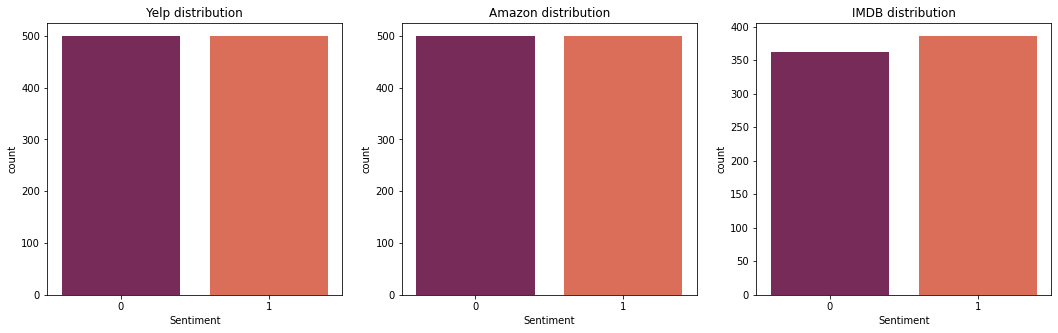

In [167]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.countplot(yelp_df['Sentiment'],palette ='rocket')
plt.title('Yelp distribution')

plt.subplot(1,3,2)
sns.countplot(amazon_df['Sentiment'],palette ='rocket')
plt.title('Amazon distribution')

plt.subplot(1,3,3)
sns.countplot(imdb_df['Sentiment'],palette ='rocket')
plt.title('IMDB distribution');

- we have a balanced dataset in all 3 types of datsets

In [129]:
print(yelp_df.isnull().sum().sum())
print(amazon_df.isnull().sum().sum())
print(imdb_df.isnull().sum().sum())

0
0
0


- we do not have any missing values present in our dataset

#### Let us combine all 3 datsets into one

In [130]:
df = yelp_df.append([amazon_df,imdb_df],ignore_index=True)
df.head()

,Reviews,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [131]:
df.shape

(2748, 2)

In [132]:
X = df['Reviews']
y = df['Sentiment']

### cleaning the data

In [133]:
import string
# python library which contains all the punctuations 
import spacy
# spacy is yet another python library which is useful for working on NLP
from spacy.lang.en.stop_words import STOP_WORDS
# we are importing stop_Words in english language
nlp = spacy.load('en_core_web_sm')

In [134]:
punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

- STOP WORDS: These are words which does not add any meaning to a sentence,simply even without those words we can get the meaning behind words<br>
example: "i am going to mall for shopping would you like to come"<br>
in the above example only words which are important are mall,shopping,come and everything else is just a stop word

In [135]:
stop_words = list(STOP_WORDS)
len(stop_words)

326

In [136]:
def text_cleaning(sentence):
  doc= nlp(sentence)

  tokens =[]
  for token in doc:
    if token.lemma_ != "-PRON-":
      temp = token.lemma_.lower().strip()
    else:
      temp = token.lower_
    tokens.append(temp)

  cleaned_tokens = []
  for token in tokens:
    if token not in stop_words and token not in punct:
      cleaned_tokens.append(token)
  return cleaned_tokens

In [137]:
text_cleaning("Hello all,Why don't we go for a Movie today")

['hello', 'movie', 'today']

- as we can see text has been converted into lowercase,punctuations are removed, and all the stopwords are removed as well

### TFIDF (Vectorization Feature Enginnering)

TFIDF : TFIDF gives weightage to a word that occurs in a corpus,if it is repeating word weightage is less if it occurs rarely weightage is more.<br>
Below is a link to understand TFIDF easily<br>
https://www.onely.com/blog/what-is-tf-idf/

In [138]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# pipeline is used to automate the work and to making code neat and in order

In [139]:
tfidf = TfidfVectorizer(tokenizer = text_cleaning)

# so basically it does 2 things one,it applies the function which we have stated above which will remove all the stop words
# and remove punctuations and it will create tokens for each sentences

- let us create a linearSVC instance

In [140]:
classifier = LinearSVC()

### train-test-split

In [141]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=0)

In [142]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(2198,) (2198,)
(550,) (550,)


In [143]:
clf = Pipeline([('tfidf',tfidf),('clf',classifier)])

# this pipeline it first applies weightage to each token and then apply a classification alogorithm

In [144]:
clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function text_cleaning at 0x7f5e5d4c2d40>)),
                ('clf', LinearSVC())])

### Predicting the test results

In [145]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [146]:
y_pred = clf.predict(X_test)

In [147]:
print('accuracy:',accuracy_score(y_test,y_pred))

accuracy: 0.7672727272727272


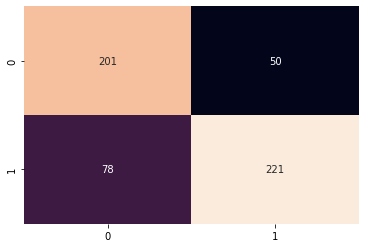

In [148]:
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,cbar=False,fmt='.5g');

In [149]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       279
           1       0.74      0.82      0.78       271

    accuracy                           0.77       550
   macro avg       0.77      0.77      0.77       550
weighted avg       0.77      0.77      0.77       550



### Predicting of a single result

In [161]:
s1 = 'The product quality is one of the worst i have seen in a long time'
s2 = " Best movie of the year"
s3 = ' food is nice however customer service is bad'
s4 = "the first half was good but the second half was boring which made the entire movie a failure"

In [162]:
def result(sentence):
  result = clf.predict([sentence])
  if result == 1:
    print('positive')
  else:
    print('negative')

In [163]:
result(s1)

negative


In [164]:
result(s2)

positive


In [165]:
result(s3)

negative


In [166]:
result(s4)

negative


conclusion:
- we can say that our model is doing a pretty good job especially in the last sentence where both positive and negative was present.

- we can try the accuracy on various different models and check if we can make it even better